In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('ProductReviews.csv')

In [2]:
data.head()

,product_id,review_id,review_type,product_name,product_rating,review_rating,rating_count,description,url
0,B0D1XD1ZV3,RB47WOU0Q32Y5,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848",I've owned multiple pairs of AirPods over the ...,https://www.amazon.com/Apple-Cancellation-Tran...
1,B0D1XD1ZV3,R3H55DLDY8DCXL,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848","First, please comment if you have any question...",https://www.amazon.com/Apple-Cancellation-Tran...
2,B0D1XD1ZV3,R3T13FTQP0PE2B,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848","I've owned all versions of airpods, normal, pr...",https://www.amazon.com/Apple-Cancellation-Tran...
3,B0D1XD1ZV3,RAX4TCFSYWT4,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848",Purchased Airpods Pro 2 with USB-C on Amazon. ...,https://www.amazon.com/Apple-Cancellation-Tran...
4,B0D1XD1ZV3,R2UOXE18J8NJLM,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848",The Apple AirPods Pro 2 are simply exceptional...,https://www.amazon.com/Apple-Cancellation-Tran...


In [3]:
print(data.shape)
data.isnull().sum()

(2898, 9)


product_id         0
review_id          0
review_type        0
product_name       0
product_rating     0
review_rating      0
rating_count       0
description       51
url                0
dtype: int64

<Axes: xlabel='review_rating', ylabel='Count'>

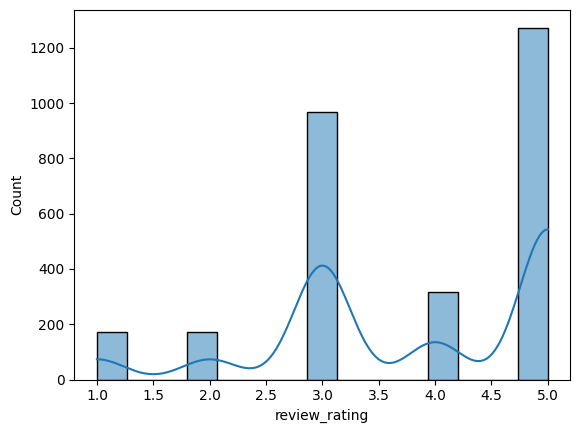

In [4]:
sns.histplot(data['review_rating'], kde=True)

In [5]:
data['review_type'].value_counts()

review_type
Positive    1579
Critical    1319
Name: count, dtype: int64

In [6]:
review_counts = data.groupby('product_name').size()
review_counts_df = review_counts.reset_index(name='review_count')
review_counts_df.head()

,product_name,review_count
0,(Pack of 2) Replacement Remote Control Only fo...,20
1,"10.1 Inch WiFi Digital Picture Frame,Digital P...",10
2,"15FT Flat Extension Cord, Flat Plug Power Stri...",20
3,2 Pack USB-A to USB-C Car Carplay Cable for iP...,1
4,"20x50 Binoculars for Adults, High Power Compac...",10


<Axes: xlabel='review_count', ylabel='Count'>

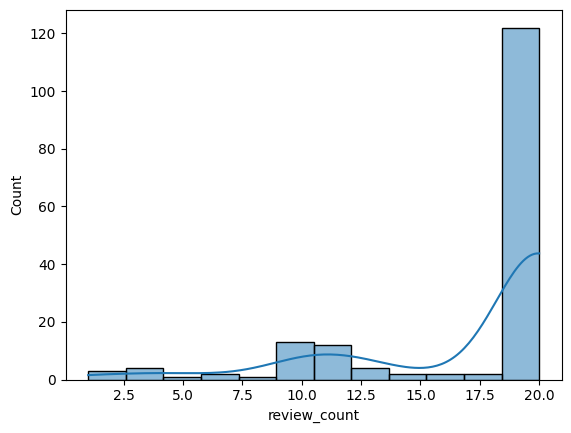

In [7]:
review_counts = data.groupby('product_name').size()
review_counts_df = review_counts.reset_index(name='review_count')
review_counts_df.head()
sns.histplot(review_counts_df['review_count'], kde=True)

<Axes: xlabel='product_rating', ylabel='Count'>

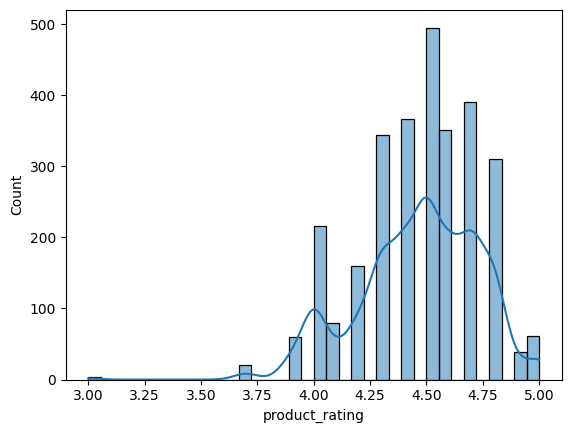

In [8]:
sns.histplot(data['product_rating'], kde=True)

<Axes: xlabel='sentiment_category', ylabel='count'>

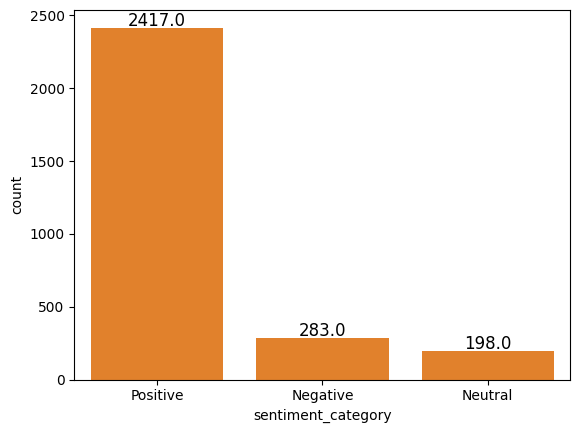

In [ ]:
from textblob import TextBlob

# Add sentiment polarity (range: -1 to 1)
data['sentiment'] = data['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral
data['sentiment_category'] = data['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)
ax = sns.countplot(data=data, x='sentiment_category')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        xytext=(0, 5),  # Vertical offset
        textcoords='offset points'
    )

# Plot sentiment distribution
sns.countplot(data=data, x='Sentiment')

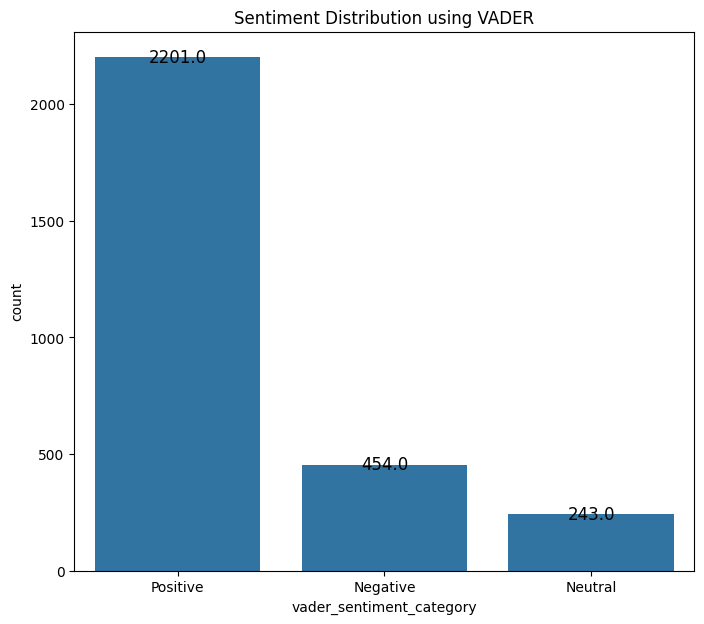

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize VADER Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER to the descriptions column
data['vader_sentiment'] = data['description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Classify sentiment as Positive, Negative, or Neutral based on the compound score
data['vader_sentiment_category'] = data['vader_sentiment'].apply(
    lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral')
)

# Create a countplot to visualize sentiment distribution
plt.figure(figsize=(8,7))
ax = sns.countplot(data=data, x='vader_sentiment_category')

# Add bar heights (counts) on top of the bars
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.text(p.get_x() + p.get_width() / 2, height,  # Adjust the position for label
            f'{height}', ha='center', va='center', fontsize=12)

plt.title('Sentiment Distribution using VADER')
plt.show()


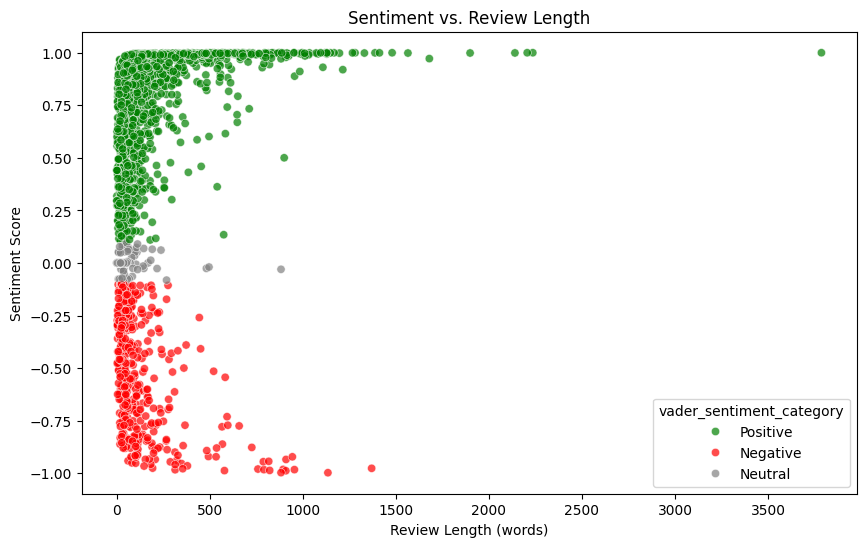

In [17]:
data['review_length'] = data['description'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='vader_sentiment', data=data, hue='vader_sentiment_category', palette=['green', 'red', 'gray'], alpha=0.7)

plt.title('Sentiment vs. Review Length')
plt.xlabel('Review Length (words)')
plt.ylabel('Sentiment Score')
plt.show()

In [24]:
top_negative_review = data[data['vader_sentiment_category'] == 'Negative'].nsmallest(1, 'vader_sentiment')
print(top_negative_review['description'].to_string())

1218    I am a long-time HP customer, and all my print...
